In [1]:
import os

In [2]:
os.chdir('..')

<img src="flow_3.png">

In [3]:
from flows.flows import Flows

/anaconda3/envs/ml-nav/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


Welcome to the Data Science Package. First create an object as follows:
For example, use the code below to import the flow 0:
flow = Flows(0)
You can define the `categorical_threshold` which is the maximum number of categories that a categorical feature should have before considering it as continuous numeric feature. The default value is 50
For example, use the code below to import the flow 0 with defining the categorical_threshold as 50
flow = Flows(flow_id=0, categorical_threshold=50)


In [4]:
flow = Flows(3)

Please use the following function to read the data
dataframe_dict = flow.load_data(path: str, files_list: list)
For example: path = './data'
For example: files_list = ['train.csv','test.csv']
The output is a dictionary that contains dataframes e.g.  
dataframe_dict = {'train': train_dataframe,'test': test_dataframe}


In [5]:
path = "./data/flow_3"
files_list = ['train_transaction.csv','test_transaction.csv']

In [6]:
dataframe_dict, columns_set = flow.load_data(path, files_list, rows_amount=1500)

A summary of the data sets


,train_transaction,test_transaction
column type,,
categorical_integer,326,325
categorical_string,14,14
continuous,54,54
date,0,0
json,0,0
other,0,0
total amount,394,393


NOTE: numeric categorical columns that contains more than 50 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
The possible ids are {'TransactionID'}
The possible possible_target are ['isFraud']
The type of the problem that should be solved {'isFraud': 'classification'}

The Kullback-Leibler Divergence between probability mass function (pmf) derived from `isFraud` and and an uniformly distributed pmf 	 = 1.257 
It is above the threshold 	 0.050. 
Imballanced target variable!


,total count,frequency (%)
isFraud values,,
0,1469,97.93
1,31,2.07


If you have categorical features with string labels, Encode the categorical features by applying the following function:
dataframe_dict, columns_set = flow.encode_categorical_feature(dataframe_dict: dict)


In [7]:
dataframe_dict["train_transaction"].head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
 columns_set["train_transaction"].keys()

dict_keys(['categorical_string', 'categorical_integer', 'continuous', 'date', 'json', 'other'])

In [9]:
dataframe_dict, columns_set = flow.encode_categorical_feature(dataframe_dict,print_results=10)

The reference dataframe is: train_transaction
there are 2 datasets provided
encoding the feature in the dataset test_transaction
the number of classes in ProductCD feature is: 5
there are 2 datasets provided
encoding the feature in the dataset test_transaction
the number of classes in card4 feature is: 4
there are 2 datasets provided
encoding the feature in the dataset test_transaction
the number of classes in card6 feature is: 2
there are 2 datasets provided
encoding the feature in the dataset test_transaction
the number of classes in P_emaildomain feature is: 47
there are 2 datasets provided
encoding the feature in the dataset test_transaction
the number of classes in R_emaildomain feature is: 32
there are 2 datasets provided
encoding the feature in the dataset test_transaction
the number of classes in M1 feature is: 2
there are 2 datasets provided
encoding the feature in the dataset test_transaction
the number of classes in M2 feature is: 3
there are 2 datasets provided
encoding the

,train_transaction,test_transaction,all data sets
string columns,,,
isFraud,2,NaN,2
ProductCD,5,5.0,5
card3,8,17.0,19
card4,4,4.0,4
card5,32,19.0,32
card6,2,2.0,2
addr2,3,2.0,3
dist2,50,31.0,74
P_emaildomain,35,38.0,47


******************************
A summary of the data sets


,train_transaction,test_transaction
column type,,
categorical_integer,340,339
categorical_string,0,0
continuous,54,54
date,0,0
json,0,0
other,0,0
total amount,394,393


NOTE: numeric categorical columns that contains more than 50 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
If some features have in all rows the same value, they have no influence on the target prediction. It is a good idea to delete such features:
coming soon!


In [10]:
ignore_columns = ['isFraud']

In [11]:
dataframe_dict, columns_set = flow.drop_columns_constant_values(dataframe_dict, ignore_columns)

V107 1
V111 1
V113 1
V117 1
V305 1
Constant columns count: 5
394 columns total
389 columns left
The set of remaining columns should be modified. Error: "['isFraud'] not in index"
A summary of the data sets


,train_transaction,test_transaction
column type,,
categorical_integer,335,334
categorical_string,0,0
continuous,54,54
date,0,0
json,0,0
other,0,0
total amount,389,388


NOTE: numeric categorical columns that contains more than 50 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
If some features are highly correlated, they do not provide more information about the target prediction. It is a good idea to drop such features but keep one:
coming soon!


In [12]:
dataframe_dict, columns_set = flow.drop_correlated_columns(dataframe_dict, ignore_columns)

Columns with correlations more than 0.98 :
C1-->C2: r^2=0.9835407950188769
C1-->C6: r^2=0.9812737003964525
C1-->C11: r^2=0.9909747200825073
C1-->C14: r^2=0.9887578813098824
C2-->C1: r^2=0.9835407950188769
C14-->C9: r^2=0.9863081932843857
D6-->D12: r^2=0.9818650779193284
D12-->D6: r^2=0.9818650779193284
M1-->V1: r^2=1.0
M1-->V2: r^2=0.9965985324667695
M1-->V3: r^2=0.9952436281820471
M1-->V4: r^2=0.9850001933811968
M1-->V5: r^2=0.9899654270654655
M1-->V6: r^2=0.9981294698320732
M1-->V7: r^2=0.997135812936052
M1-->V8: r^2=0.9981294698320732
M1-->V9: r^2=0.9973606874850252
M1-->V11: r^2=0.9879778663680381
V1-->M1: r^2=1.0
V11-->V10: r^2=0.992451033861086
V12-->V13: r^2=0.9929947990022691
V13-->V12: r^2=0.9929947990022691
V14-->V17: r^2=0.9841955597731995
V14-->V18: r^2=0.9841955597731995
V14-->V23: r^2=0.9900571549039844
V14-->V24: r^2=0.9852809338973325
V14-->V25: r^2=0.9922661532645525
V14-->V26: r^2=0.9854542185667928
V14-->V27: r^2=0.9968802900331691
V14-->V28: r^2=0.9968802900331691
V

V300-->V301: r^2=0.9864229915545116
V301-->V300: r^2=0.9864229915545116
V302-->V304: r^2=0.996271121947219
V304-->V302: r^2=0.996271121947219
V319-->V321: r^2=0.9846392022251858
V321-->V319: r^2=0.9846392022251858
V331-->V332: r^2=0.9922240144083385
V331-->V333: r^2=0.9971864304180247
V332-->V331: r^2=0.9922240144083385
389 columns total
123 columns left
The set of remaining columns should be modified. Error: "['isFraud'] not in index"
A summary of the data sets


,train_transaction,test_transaction
column type,,
categorical_integer,81,78
categorical_string,0,0
continuous,42,44
date,0,0
json,0,0
other,0,0
total amount,123,122


NOTE: numeric categorical columns that contains more than 50 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
If you have numeric features, it is a good idea to normalize numeric features. Use the following function for feature normalization :
dataframe_dict, columns_set = flow.scale_data (dataframe_dict: dict, ignore_columns: list)
For example: ignore_columns = ['id', 'target']


In [13]:
ignore_columns = ["TransactionID", "isFraud"]

In [14]:
dataframe_dict, columns_set = flow.scale_data(dataframe_dict, ignore_columns)

A summary of the data sets


,train_transaction,test_transaction
column type,,
categorical_integer,81,78
categorical_string,0,0
continuous,42,44
date,0,0
json,0,0
other,0,0
total amount,123,122


NOTE: numeric categorical columns that contains more than 50 classes are considered numeric continuous features.
NOTE: You can modify the threshold value if you want to consider more or less numeric categorical features as numeric continuous features.
Your features are ready to train the model: 
If you want to explore the data you can run one of the following functions: 
1 . flow.exploring_data(dataframe_dict: dict, key_i: str)
For example: flow.exploring_data(dataframe_dict, 'train')
2 . flow.comparing_statistics(dataframe_dict: dict)
For example: flow.comparing_statistics(dataframe_dict)




You can start training the model by applying the following function: 
model_index_list, save_models_dir, y_test = flow.training(parameters)
parameters = { 
 "data": {
 "train": {"features": train_dataframe, "target": train_target},
 "valid": {"features": valid_dataframe, "target": valid_target},
 "test": {"features": test_dataframe, "target": test_target},
 },
 "split": {
 "method": "split",  # "

Exploring column: TransactionID
If there are missing values, they will be replaced by the term: -9999
The 5 most repeated values:
the value 3663871     is found  1 times
the value 3664374     is found  1 times
the value 3664365     is found  1 times
the value 3664366     is found  1 times
the value 3664367     is found  1 times
The 5 least repeated values
the value 3664874     is found  1 times
the value 3664875     is found  1 times
the value 3664876     is found  1 times
the value 3664877     is found  1 times
the value 3663872     is found  1 times
The number of unique values is --> 1500
If you applied a normalization function, the x axis will show the normalized values.


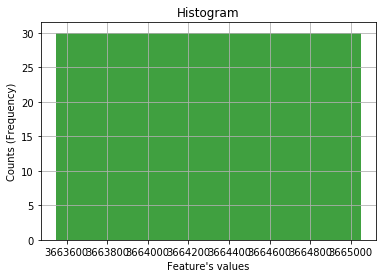

In [15]:
flow.exploring_data(dataframe_dict, "test_transaction")

TransactionID: Comparing the statistical properties


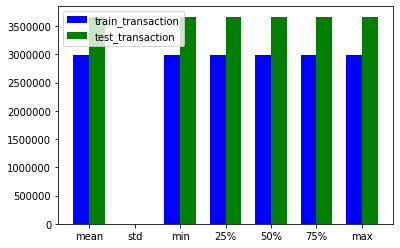

In [16]:
flow.comparing_statistics(dataframe_dict)

In [17]:
columns = dataframe_dict["train_transaction"].columns
train_dataframe = dataframe_dict["train_transaction"][
    [x for x in columns_set["train_transaction"]["continuous"] if x not in ignore_columns]]
test_dataframe = dataframe_dict["test_transaction"][
    [x for x in columns_set["train_transaction"]["continuous"] if x not in ignore_columns]]
train_target = dataframe_dict["train_transaction"]["isFraud"]

In [18]:
parameters = {
    "data": {
        "train": {"features": train_dataframe, "target": train_target.to_numpy()},
    },
    "split": {
        "method": "kfold",  # "method":"kfold"
        "fold_nr": 5,  # foldnr:5 , "split_ratios": 0.8 # "split_ratios":(0.7,0.2)
    },
    "model": {"type": "Logistic regression",
              "hyperparameters": {"alpha": "optimize",  # alpha:optimize
                                  },
              },
    "metrics": ["accuracy_score", "roc_auc_score"],
    "predict": {
        "test": {"features": test_dataframe}
    }
}

In [19]:
model_index_list, save_models_dir, y_test = flow.training(parameters)

shuffle is not provided: 'shuffle'
random_state is not provided: 'random_state'
fold_nr. 1
fold_nr. 2
fold_nr. 3
fold_nr. 4
fold_nr. 5


,fold_1,fold_2,fold_3,fold_4,fold_5,mean
accuracy_score (train.train),0.9808,0.9808,0.980800,0.9808,0.9808,0.980800
accuracy_score (train.validation),0.9800,0.9800,0.976700,0.9800,0.9800,0.979340
roc_auc_score (train.train),0.5400,0.5400,0.520833,0.5400,0.5400,0.536167
roc_auc_score (train.validation),0.5000,0.5000,0.500000,0.5000,0.5000,0.500000


,model 1,model 2,model 3,model 4,model 5,mean
accuracy_score (train),0.980700,0.980700,0.980000,0.980700,0.980700,0.980560
roc_auc_score (train),0.532258,0.532258,0.516129,0.532258,0.532258,0.529032


This is the end of the flow


In [20]:
parameters_lighgbm = {
    "data": {
        "train": {"features": train_dataframe, "target": train_target.to_numpy()},
    },
    "split": {
        "method": "kfold",  # "method":"kfold"
        "fold_nr": 5,  # foldnr:5 , "split_ratios": 0.8 # "split_ratios":(0.7,0.2)
    },
    "model": {"type": "lightgbm",
              "hyperparameters": dict(objective='binary', metric='cross-entropy', num_leaves=5,
                                      boost_from_average=True,
                                      learning_rate=0.05, bagging_fraction=0.99, feature_fraction=0.99, max_depth=-1,
                                      num_rounds=10000, min_data_in_leaf=10, boosting='dart')
              },
    "metrics": ["accuracy_score", "roc_auc_score"],
    "predict": {
        "test": {"features": test_dataframe}
    }
}

In [21]:
m=None
f"sss {m}"

'sss None'

In [22]:
model_index_list, save_models_dir, y_test = flow.training(parameters_lighgbm)

shuffle is not provided: 'shuffle'
random_state is not provided: 'random_state'
fold_nr. 1
fold_nr. 2
fold_nr. 3
fold_nr. 4
fold_nr. 5


,fold_1,fold_2,fold_3,fold_4,fold_5,mean
accuracy_score (train.train),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
accuracy_score (train.validation),0.983300,0.986700,0.990000,0.983300,0.986700,0.986000
roc_auc_score (train.train),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
roc_auc_score (train.validation),0.824263,0.821995,0.884934,0.878685,0.822562,0.846488


,model 1,model 2,model 3,model 4,model 5,mean
accuracy_score (train),0.996700,0.997300,0.998000,0.996700,0.997300,0.997200
roc_auc_score (train),0.966973,0.964931,0.973407,0.980632,0.968489,0.970886


This is the end of the flow


In [23]:
parameters_xgboost = {
    "data": {
        "train": {"features": train_dataframe, "target": train_target.to_numpy()},
    },
    "split": {
        "method": "kfold",  # "method":"kfold"
        "fold_nr": 5,  # fold_nr:5 , "split_ratios": 0.3 # "split_ratios":(0.3,0.2)
    },
    "model": {"type": "xgboost",
              "hyperparameters": {'max_depth': 5, 'eta': 1, 'eval_metric': "auc", 'objective':'binary:logistic'}
              },
    "metrics": ["accuracy_score", "roc_auc_score"],
    "predict": {
        "test": {"features": test_dataframe}
    }
}

In [24]:
model_index_list, save_models_dir, y_test = flow.training(parameters_xgboost)

shuffle is not provided: 'shuffle'
random_state is not provided: 'random_state'
fold_nr. 1
The num_round is not defined. The default value is num_round = 10. Error: 'num_round'
[0]	train-auc:0.574689	test-auc:0.561791
[1]	train-auc:0.889413	test-auc:0.710884
[2]	train-auc:0.929038	test-auc:0.651644
[3]	train-auc:0.987592	test-auc:0.640306
[4]	train-auc:0.996647	test-auc:0.781463
[5]	train-auc:0.999064	test-auc:0.748016
[6]	train-auc:0.99983	test-auc:0.797336
[7]	train-auc:1	test-auc:0.8339
[8]	train-auc:1	test-auc:0.85941
[9]	train-auc:1	test-auc:0.898526
fold_nr. 2
The num_round is not defined. The default value is num_round = 10. Error: 'num_round'
[0]	train-auc:0.55794	test-auc:0.496599
[1]	train-auc:0.846043	test-auc:0.760488
[2]	train-auc:0.981583	test-auc:0.779478
[3]	train-auc:0.997328	test-auc:0.748299
[4]	train-auc:0.999115	test-auc:0.723356
[5]	train-auc:0.999745	test-auc:0.744331
[6]	train-auc:0.999898	test-auc:0.702664
[7]	train-auc:1	test-auc:0.761338
[8]	train-auc:1	test-

,fold_1,fold_2,fold_3,fold_4,fold_5,mean
accuracy_score (train.train),0.999200,0.999200,1.000000,1.000000,1.000000,0.999680
accuracy_score (train.validation),0.983300,0.983300,0.983300,0.980000,0.983300,0.982640
roc_auc_score (train.train),1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
roc_auc_score (train.validation),0.898526,0.779195,0.918576,0.912698,0.886621,0.879123


,model 1,model 2,model 3,model 4,model 5,mean
accuracy_score (train),0.996000,0.996000,0.996700,0.996000,0.996700,0.99628
roc_auc_score (train),0.982828,0.955785,0.983311,0.985858,0.980566,0.97767


This is the end of the flow


In [25]:
train_dataframe = dataframe_dict['train_transaction'].drop(['isFraud'],1)
train_target = dataframe_dict["train_transaction"]["isFraud"]

test_dataframe = dataframe_dict['test_transaction']  #.drop(['isFraud'],1)

parameters_sklearn = {
    "data": {
        "train": {
            "features": train_dataframe,
            "target": train_target.to_numpy()
        }, 
    },
    "split": {
        "method": "split",
        "split_ratios": 0.2,
        "stratify": True
    },
    "model": {
        "type": "sklearn.ensemble.RandomForestClassifier",
        "hyperparameters": {
            'params_grid':{
                'class_weight': ["balanced_subsample"],
                'max_depth': [5, 10, 20, 999],
                'min_samples_leaf': [10, 3, 1]
            },
            'params_fixed': {
                'max_depth': 4, 
                'min_samples_split': 10, 
                'min_samples_leaf': 2, 
                'random_state': 11
            },
            'params_cv': {
                'n_splits': 5, 
                'shuffle': True, 
                'random_state': 11
            },
            "objective": "classification",
            "grid_search_scoring": ['roc_auc', 'accuracy']
        },
    },
    "metrics": ['roc_auc_score', 'accuracy_score'],
    "predict": {
        "test": {
            "features": test_dataframe
        }
    }
}

In [26]:
model_index_list, save_models_dir, y_test = flow.training(parameters_sklearn)

,model 0
accuracy_score (train.train),1.000000
accuracy_score (train.validation_0),0.976700
roc_auc_score (train.train),1.000000
roc_auc_score (train.validation_0),0.661565


,model 0
accuracy_score (train),0.995300
roc_auc_score (train),0.934463


This is the end of the flow
